In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def plot_energy(audio):
    f = wave.open(audio, 'rb')
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)#读取音频，字符串格式
    waveData = np.fromstring(strData,dtype=np.int16)#将字符串转化为int
    #print(len(strData), len( waveData))
    #waveData = np.reshape(waveData,[nframes,nchannels]).T
    #waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
    # plot the wave
    time = np.arange(0,nframes)*(1.0 / framerate)
    print(max(waveData), min(waveData))
    plt.plot(time,waveData)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.title("Single channel wavedata")
    plt.grid('on')#标尺，on：有，off:无。
    return max(waveData)

In [7]:
def plot_yuputu(audio):
    #绘制频谱
    f = wave.open(audio, 'rb')
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    strData = f.readframes(nframes)#读取音频，字符串格式
    waveData = np.fromstring(strData,dtype=np.int16)
    
    print("plotting spectrogram...")
    framelength = 0.025 #帧长20~30ms
    framesize = framelength*16000 #每帧点数 N = t*fs,通常情况下值为256或512,要与NFFT相等\
                                        #而NFFT最好取2的整数次方,即framesize最好取的整数次方

    #找到与当前framesize最接近的2的正整数次方
    nfftdict = {}
    lists = [32,64,128,256,512,1024]
    for i in lists:
        nfftdict[i] = abs(framesize - i)
    sortlist = sorted(nfftdict.items(), key=lambda x: x[1])#按与当前framesize差值升序排列
    framesize = int(sortlist[0][0])#取最接近当前framesize的那个2的正整数次方值为新的framesize

    NFFT = framesize #NFFT必须与时域的点数framsize相等，即不补零的FFT
    overlapSize = 1.0/3 * framesize #重叠部分采样点数overlapSize约为每帧点数的1/3~1/2
    overlapSize = int(round(overlapSize))#取整
    waveData = np.reshape(waveData,[nframes,nchannels]).T
    spectrum,freqs,ts,fig = plt.specgram(waveData[0],NFFT = NFFT,Fs =framerate,window=np.hanning(M = framesize),
                                         noverlap=overlapSize,mode='default',scale_by_freq=True,sides='default',
                                         scale='dB',xextent=None)#绘制频谱图 
    #print(ts* 1000)
    #print(np.mean(ts) *1000, np.median(ts)*1000)
    plt.ylabel('Frequency')
    plt.xlabel('Time(s)')
    plt.title('Spectrogram')

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


14730 -19181
5218 -4520
3026 -2523
3150 -3437
5247 -3610
13237 -13962
4099 -3375
2351 -2326
5811 -6704
11579 -13740
12015 -14271
8203 -8355
5561 -6566
6101 -5584
10625 -11108
2704 -2823
2991 -4105
4395 -4805
2203 -1998
2377 -2369
25531 -28311
3510 -3774
4075 -3669
6643 -6418
4072 -3842
9263 -10015
3966 -3576
2443 -2874
2417 -2405
1826 -1875
3832 -4070
5387 -5209
2984 -3171
8708 -7775
3608 -2926
4387 -4346
3817 -3394
2767 -2643
3979 -4709
3919 -3275
1217 -1115
1338 -1345
6233 -6838
3088 -3428
1973 -1984
4605 -4544
1418 -1468
4725 -4890
3905 -3834
29216 -26450
1008 -949
5623 -6208
1343 -1258
1149 -883
12960 -13400
2530 -2667
2534 -2183
2915 -2933
12199 -9720
9991 -8514
10046 -8114
31441 -30489
2124 -1812
2075 -1747
3938 -3841
3593 -3348
14382 -11700
3287 -2690
2522 -2485
7488 -10895
19533 -22382
30075 -27951
8016 -7460
6241 -6682
2041 -1821
3967 -5228
3435 -4478
32634 -32768
1475 -996
3202 -2385
1589 -1457
1804 -1529
1193 -991
1176 -1094
1528 -1655
6577 -5032
1991 -2130
1955 -1449
1583 -

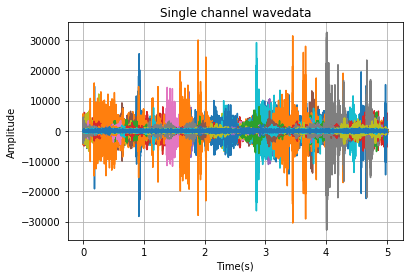

In [22]:
energy_list = []
for cateegory in os.listdir('audio_wav3/nobody'):
    file_name = os.path.join('audio_wav3/nobody', cateegory)
    a = plot_energy(file_name)
    energy_list.append(a)

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


32767 -32768
32767 -32768
32767 -32768
31912 -32768
31438 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32691 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32751 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32243 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32677 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
31799 -32768
32767 -32768

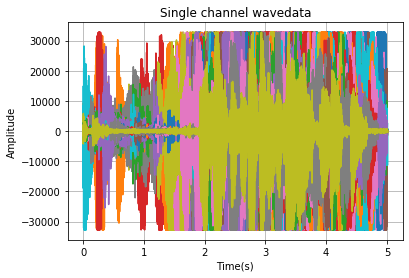

In [23]:
energy_list = []
for cateegory in os.listdir('audio_wav3/lingli'):
    file_name = os.path.join('audio_wav3/lingli', cateegory)
    a = plot_energy(file_name)
    energy_list.append(a)

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
26395 -20321
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
31672 -28578
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32197
32767 -32673
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
30615 -31155
32767 -31664
32767 -32768
32767 -32768
32767 -32503
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768

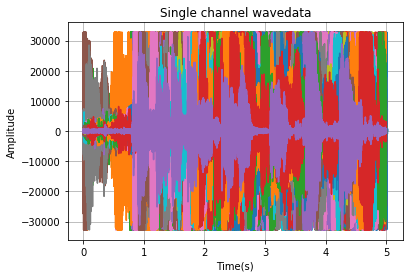

In [24]:
energy_list = []
for cateegory in os.listdir('audio_wav3/linkunling'):
    file_name = os.path.join('audio_wav3/linkunling', cateegory)
    a = plot_energy(file_name)
    energy_list.append(a)

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
30895 -28095
32767 -32768
32767 -32768
31701 -28817
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
20356 -25418
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768


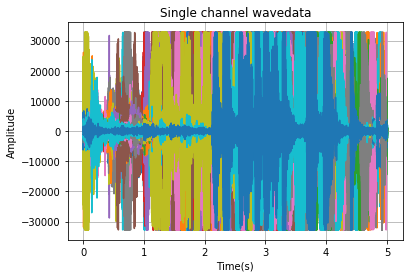

In [30]:
energy_list = []
for cateegory in os.listdir('audio_wav3/liusong_a5'):
    file_name = os.path.join('audio_wav3/liusong_a5/', cateegory)
    a = plot_energy(file_name)
    energy_list.append(a)

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


32767 -32768
32767 -32065
32767 -32768
31720 -32768
25963 -28331
31885 -32768
32767 -32768
32767 -32768
26271 -28823
32767 -32768
32767 -32768
32494 -32768
32767 -31981
24320 -22077
26503 -22593
22908 -25447
32767 -27942
18183 -19796
27811 -30077
32599 -25493
30422 -32768
32767 -32768
28895 -27933
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
32767 -32768
31621 -28155
32767 -32768
32767 -32768
32767 -32768
23839 -24214
32767 -32768
32767 -32768
30819 -30896
32767 -32768
32767 -27953
25549 -25096
28103 -26752

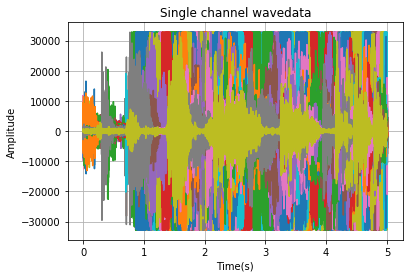

In [31]:
energy_list = []
for cateegory in os.listdir('audio_wav3/xiefei_a5'):
    file_name = os.path.join('audio_wav3/xiefei_a5/', cateegory)
    a = plot_energy(file_name)
    energy_list.append(a)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


32494 -32768


32494

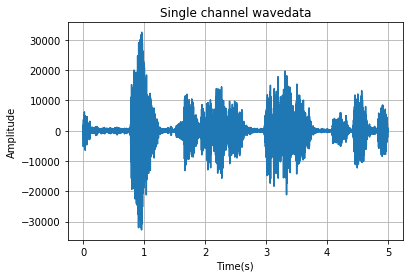

In [5]:
plot_energy('audio_wav_de_txt/xiefei_a5/xiefei_a51585792516.wav')

plotting spectrogram...


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


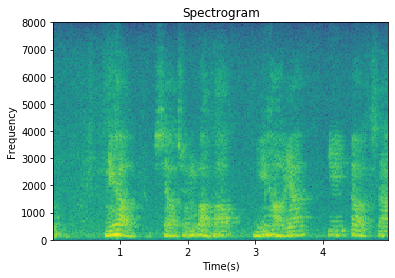

In [9]:
#plot_energy('audio_wav_2/surroundings2/surroundings21583303614.wav')
plot_yuputu('audio_wav_de_txt/xiefei_a5/xiefei_a51585792516.wav')

plotting spectrogram...


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


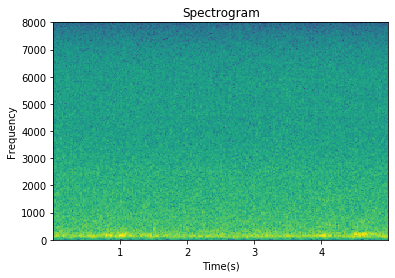

In [8]:
#plot_energy('audio_wav_2/surroundings2/surroundings21583303731.wav')
plot_yuputu('audio_wav_de_txt/nobody/nobody1585737779.wav')

3150 -3437


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


3150

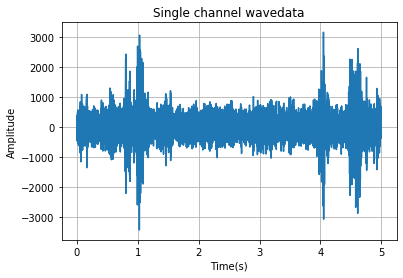

In [10]:
plot_energy('audio_wav_de_txt/nobody/nobody1585737779.wav')

plotting spectrogram...


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


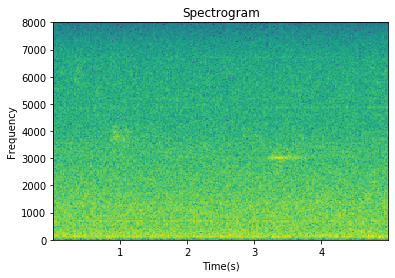

In [11]:
#plot_energy('audio_wav_2/surroundings2/surroundings21583303935.wav')
plot_yuputu('audio_wav_2/surroundings2/surroundings21583303935.wav')

plotting spectrogram...


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


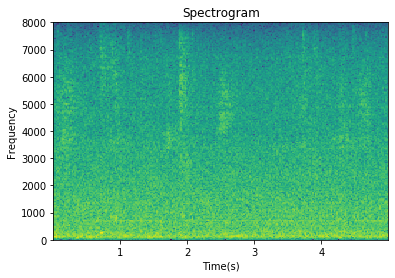

In [12]:
#plot_energy('audio_wav_2/surroundings2/surroundings21583304000.wav')
plot_yuputu('audio_wav_2/surroundings2/surroundings21583304000.wav')

710 -643


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


710

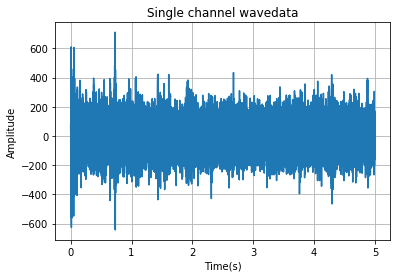

In [13]:
plot_energy('audio_wav_2/surroundings2/surroundings21583304000.wav')

plotting spectrogram...
4960.5


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


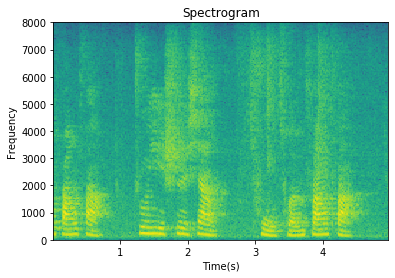

In [31]:
#plot_energy('audio_wav_2/linkunling2/linkunling21583301748.wav')
plot_yuputu('audio_wav_2/linkunling2/linkunling21583301748.wav')

plotting spectrogram...
4981.8125


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


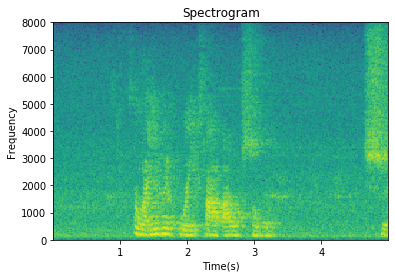

In [32]:
#plot_energy('audio_wav_2/linkunling2/linkunling21583301987.wav')
plot_yuputu('audio_wav_2/linkunling2/linkunling21583301987.wav')

plotting spectrogram...
4981.8125


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


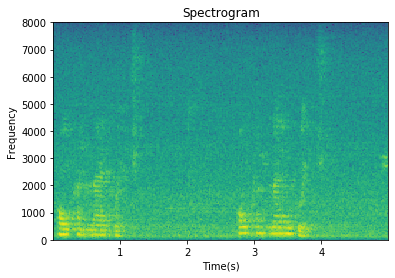

In [33]:
#plot_energy('audio_wav_2/linkunling2/linkunling21583302280.wav')
plot_yuputu('audio_wav_2/linkunling2/linkunling21583302280.wav')

plotting spectrogram...
4981.8125


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


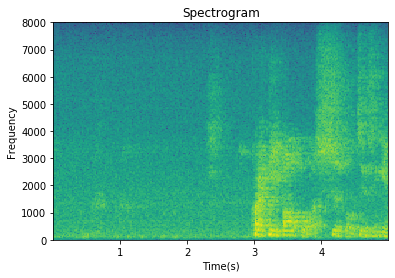

In [34]:
#plot_energy('audio_wav_2/suboss2/suboss21583308823.wav')
plot_yuputu('audio_wav_2/suboss2/suboss21583308823.wav')

plotting spectrogram...
4981.8125


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


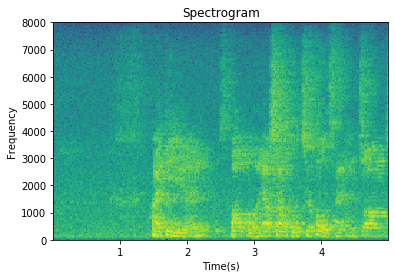

In [35]:
#plot_energy('audio_wav_2/suboss2/suboss21583308959.wav')
plot_yuputu('audio_wav_2/suboss2/suboss21583308959.wav')

plotting spectrogram...


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


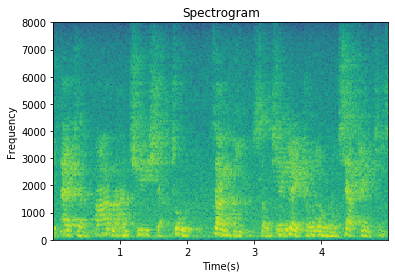

In [15]:
#plot_energy('audio_wav_2/xiefei/xiefei1583305609.wav')
plot_yuputu('audio_wav_2/xiefei/xiefei1583305609.wav')

159680 79840
10803 -11302
plotting spectrogram...


D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


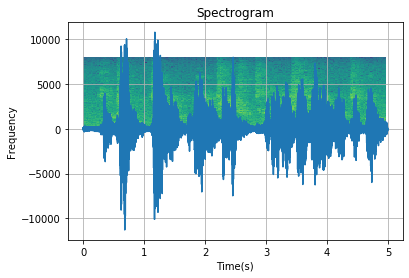

In [56]:
plot_energy('audio_wav_2/xiefei/xiefei1583305694.wav')
plot_yuputu('audio_wav_2/xiefei/xiefei1583305694.wav')

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


160000 80000
11246 -12767
plotting spectrogram...


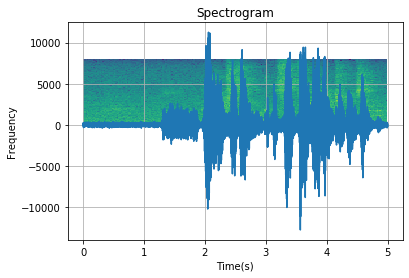

In [58]:
plot_energy('audio_wav_2/xiefei/xiefei1583305854.wav')


plotting spectrogram...
[  16.       37.3125   58.625    79.9375  101.25    122.5625  143.875
  165.1875  186.5     207.8125  229.125   250.4375  271.75    293.0625
  314.375   335.6875  357.      378.3125  399.625   420.9375  442.25
  463.5625  484.875   506.1875  527.5     548.8125  570.125   591.4375
  612.75    634.0625  655.375   676.6875  698.      719.3125  740.625
  761.9375  783.25    804.5625  825.875   847.1875  868.5     889.8125
  911.125   932.4375  953.75    975.0625  996.375  1017.6875 1039.
 1060.3125 1081.625  1102.9375 1124.25   1145.5625 1166.875  1188.1875
 1209.5    1230.8125 1252.125  1273.4375 1294.75   1316.0625 1337.375
 1358.6875 1380.     1401.3125 1422.625  1443.9375 1465.25   1486.5625
 1507.875  1529.1875 1550.5    1571.8125 1593.125  1614.4375 1635.75
 1657.0625 1678.375  1699.6875 1721.     1742.3125 1763.625  1784.9375
 1806.25   1827.5625 1848.875  1870.1875 1891.5    1912.8125 1934.125
 1955.4375 1976.75   1998.0625 2019.375  2040.6875 2062.     2083

D:\Users\CYT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


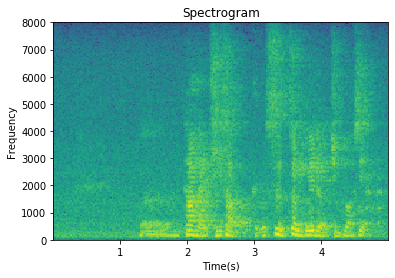

In [47]:
plot_yuputu('audio_wav_2/xiefei/xiefei1583305854.wav')